# The Framework to Follow

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experiments

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing all required modules

# Regular EDA (exploratory data analysis) and plotting data :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing machine learning models required

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve

In [4]:
df = pd.read_csv('Datasets/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

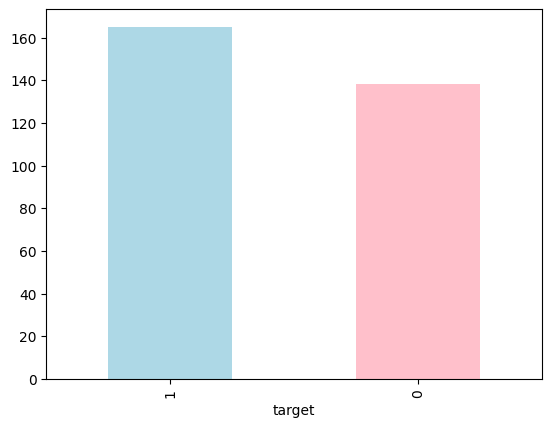

In [7]:
df.target.value_counts().plot(kind='bar',color=['lightblue','pink']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# comparing target column with sex column
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


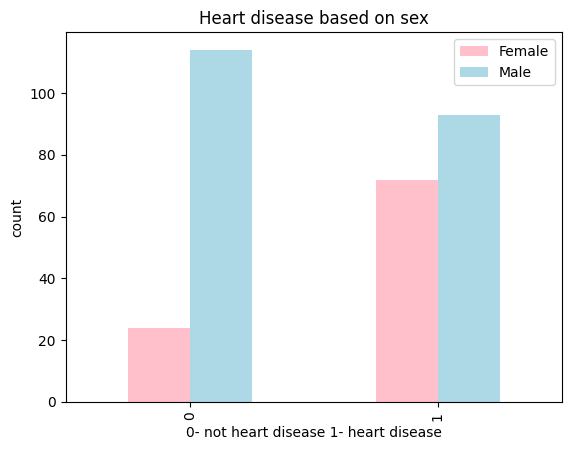

In [13]:
pd.crosstab(df.target, df.sex ).plot(kind='bar',color=['pink','lightblue'])
plt.title('Heart disease based on sex')
plt.xlabel('0- not heart disease 1- heart disease')
plt.ylabel('count')
plt.legend(['Female','Male'])
plt.show();

In [14]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# Age vs Max heart rate for heart disease

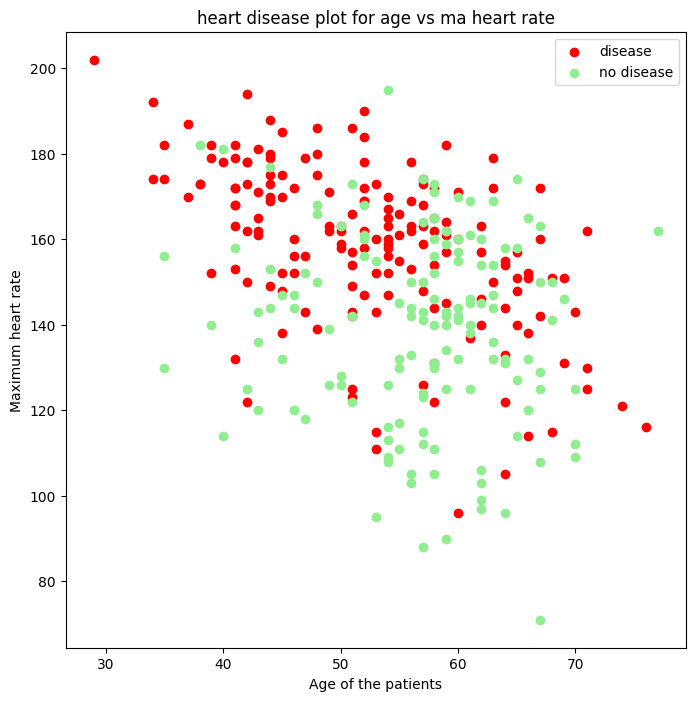

In [15]:
plt.figure(figsize=(8,8))
# scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='red',label='disease')
# scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightgreen', label = 'no disease')

plt.title('heart disease plot for age vs ma heart rate')
plt.xlabel('Age of the patients')
plt.ylabel('Maximum heart rate')
plt.legend()
plt.show();

<Axes: ylabel='Frequency'>

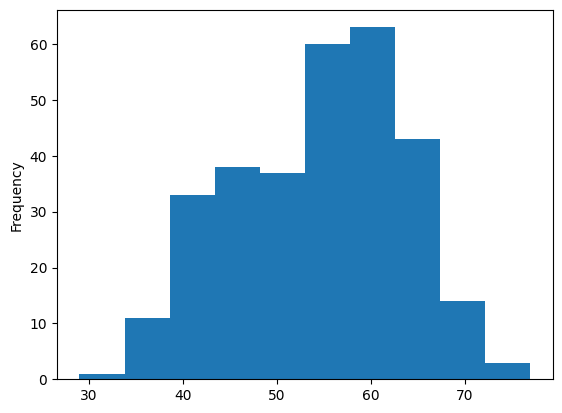

In [16]:
df.age.plot.hist()

# Heart disease frequency based on the type of the chest pain
* 0 : typical angina
* 1 : atypical angina
* 2 : non-anginal pain
* 3 : asymptomatic

In [17]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


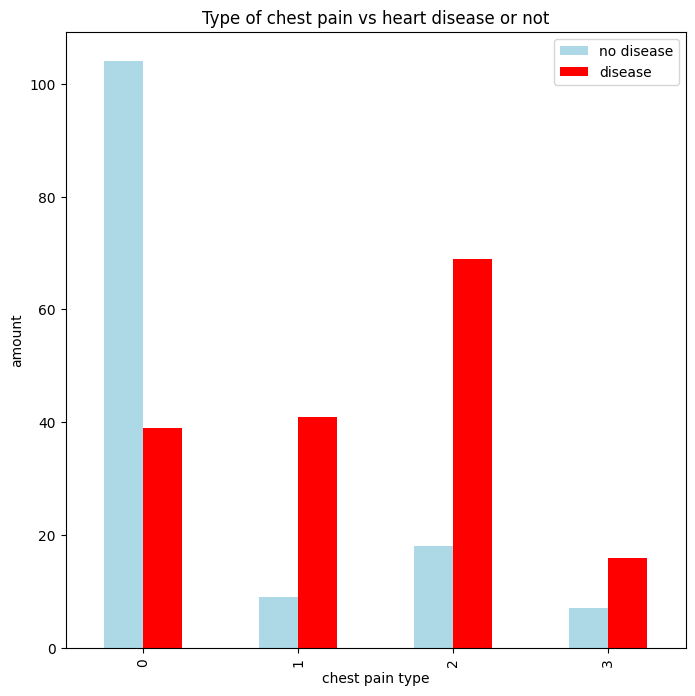

In [18]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(8,8),color=['lightblue','red'])

plt.title('Type of chest pain vs heart disease or not')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.show();


<Axes: >

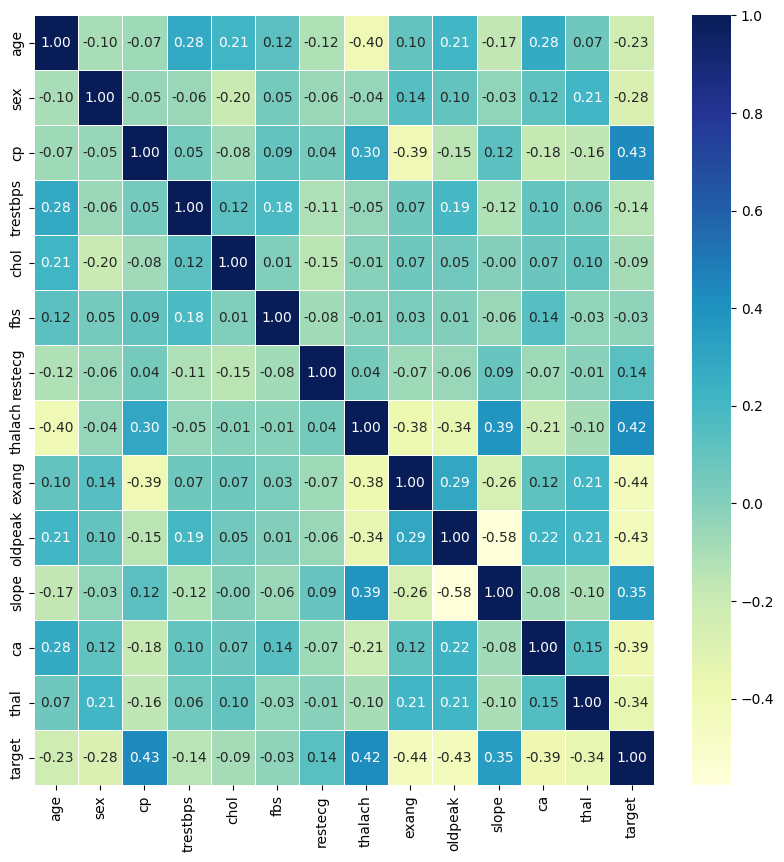

In [19]:
# plotting a correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix ,annot= True , linewidths=0.5 ,fmt = '0.2f' , cmap = 'YlGnBu')

# Modelling 

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = df.drop('target' , axis=1)
y = df.target

In [22]:
np.random.seed(42)


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)
len(xtrain)==len(ytrain)

True

In [23]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


# we are going to try three different models for the problem

* LogisticRegression
* KNeighborsClassifier
* RandomForestClassifier

In [24]:
models = {'Logistic Regression': LogisticRegression(),
          'KNeighboursClassifier': KNeighborsClassifier(),
         'RandomForestClassifier': RandomForestClassifier()}

In [25]:
# create a function to fit the data to the different models and score the models

def fitandscore(models, xtrain, xtest, ytrain, ytest):
    np.random.seed(42)

    scores={}

    for name, model in models.items():

        model.fit(xtrain,ytrain)
        
        scores[name] = model.score(xtest,ytest)

    return scores

In [26]:
model_scores = fitandscore(models, xtrain = xtrain, xtest = xtest, ytrain = ytrain, ytest = ytest)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNeighboursClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

In [27]:
model_compare = pd.DataFrame(model_scores , index = ['Accuracy'])
model_compare

,Logistic Regression,KNeighboursClassifier,RandomForestClassifier
Accuracy,0.885246,0.688525,0.836066


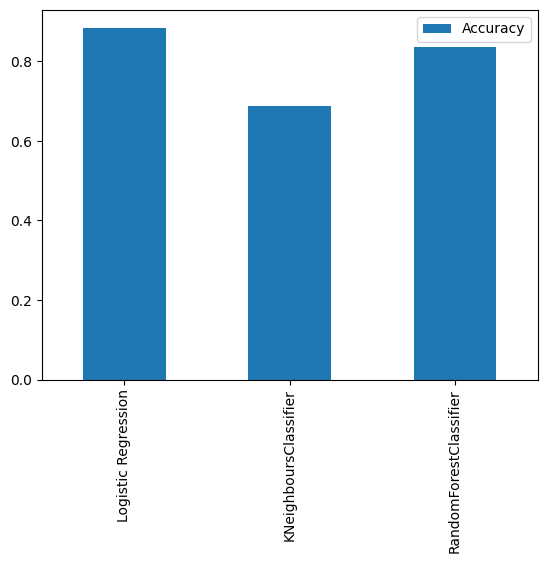

In [28]:
model_compare.T.plot.bar();

# Tuning the models 

In [29]:
# now we are going to tune KNN

train_scores = []
test_scores = []

knn = KNeighborsClassifier()

neighbours = range(1,21)

for i in neighbours:

    knn.set_params(n_neighbors=i)
    knn.fit(xtrain, ytrain)

    # appending training data scores
    train_scores.append(knn.score(xtrain,ytrain))
    # appending testing data scores
    test_scores.append(knn.score(xtest,ytest))

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum of knn score on test data is 75.41% 



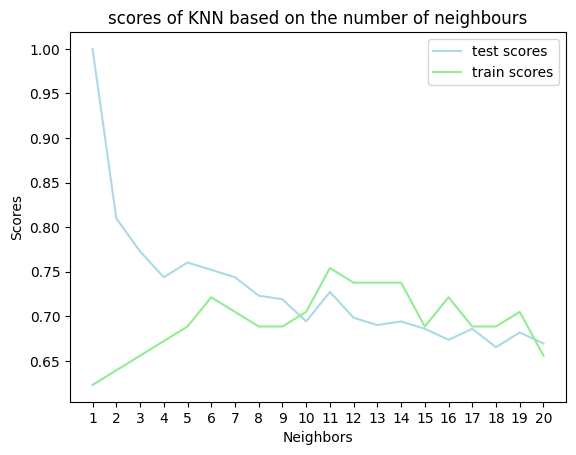

In [31]:
print(f'Maximum of knn score on test data is {max(test_scores)*100:.2f}% \n')

plt.plot(neighbours, train_scores, color = 'lightblue', label = 'test scores')
plt.plot(neighbours, test_scores, color = 'lightgreen', label = 'train scores')
plt.title('scores of KNN based on the number of neighbours')
plt.xlabel('Neighbors')
plt.xticks(range(1,21,1))
plt.ylabel('Scores')
plt.legend()
plt.show();

# Hyper parameter tuning using RandomizedSearchCV

In [32]:
log_grid = {'C': np.logspace(-4,4,20),
            'solver':['liblinear']}

RF_grid = {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf' : np.arange(1,20,2)
          }

In [33]:
# Tuning Logistic Regression

np.random.seed(42)

rs_logistic = RandomizedSearchCV(estimator = LogisticRegression() ,
                                param_distributions= log_grid,
                                cv=5,
                                n_iter=20 , 
                                verbose = True)

# fitting the data

rs_logistic.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_logistic.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_logistic.score(xtest,ytest)

0.8852459016393442

In [36]:
# Tuning the RandomforestClassifier

np.random.seed(42)

rs_randomforest = RandomizedSearchCV(estimator = RandomForestClassifier() ,
                                param_distributions= RF_grid,
                                cv=5,
                                n_iter=20 , 
                                verbose = True)

# fitting the data

rs_randomforest.fit(xtrain, ytrain)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_randomforest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_randomforest.score(xtest, ytest)

0.8688524590163934

# Using GridSearchCV 

In [39]:
log_grid_GS = {'C': np.logspace(-4,4,30),
            'solver':['liblinear']}

GS_log = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=log_grid_GS,
                     verbose= True,
                     cv = 5)

GS_log.fit(xtrain, ytrain)

GS_log.score(xtest, ytest)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

# Evaluating the model using RAC curve and AUC curve

In [40]:
ypreds = GS_log.predict(xtest)

ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
ytest

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [42]:
roc_curve(ytest ,ypreds)

(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([inf,  1.,  0.]))

<Figure size 1000x1000 with 0 Axes>

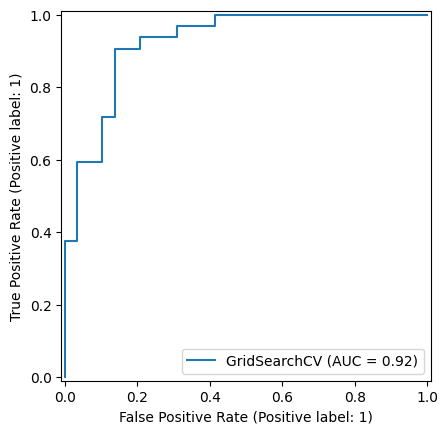

In [43]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,10))
RocCurveDisplay.from_estimator(GS_log,xtest,ytest);

Text(33.22222222222222, 0.5, 'True values')

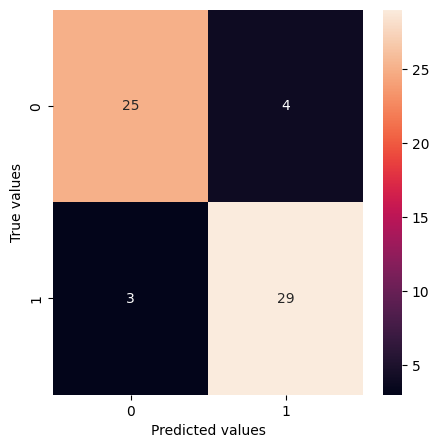

In [44]:
# using confusion matrix
cm = confusion_matrix(ytest,ypreds)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')


In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

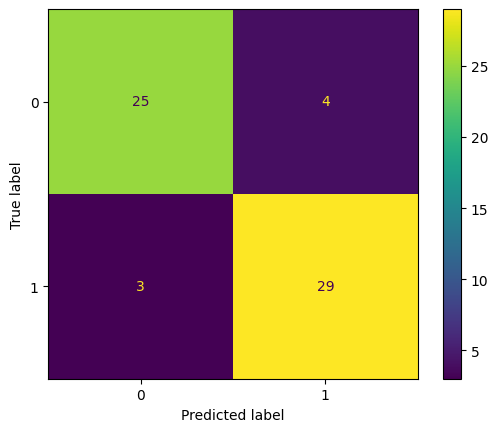

In [46]:
ConfusionMatrixDisplay.from_predictions(ytest, ypreds)

In [47]:
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# evaluation using cross validation

In [48]:
GS_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C = 0.20433597178569418 , solver = 'liblinear')

cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

np.mean(cv_acc)

0.8479781420765027

In [50]:
cv_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')

np.mean(cv_precision)

0.8215873015873015

In [51]:
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')

np.mean(cv_recall)

0.9272727272727274

In [52]:
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')

np.mean(cv_f1)

0.8705403543192143

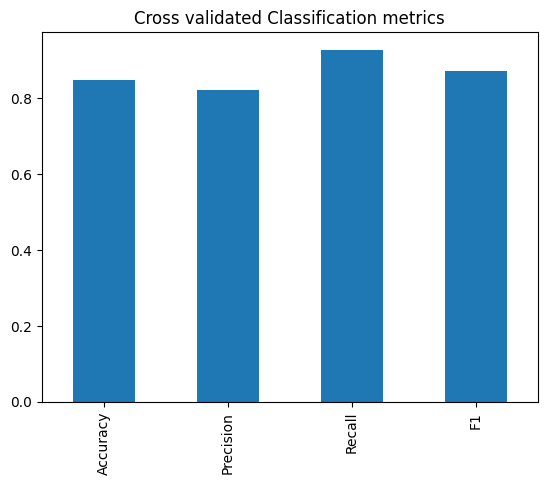

In [53]:
cv_metrics = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                          'Precision':np.mean(cv_precision),
                          'Recall':np.mean(cv_recall),
                          'F1':np.mean(cv_f1)},index=[0])

cv_metrics.T.plot.bar(title = 'Cross validated Classification metrics',legend = False);

# The most important Features

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# Finding the most important features in the given dataset

In [56]:
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
clf.fit(xtrain, ytrain)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [58]:
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [59]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature Importance'}>

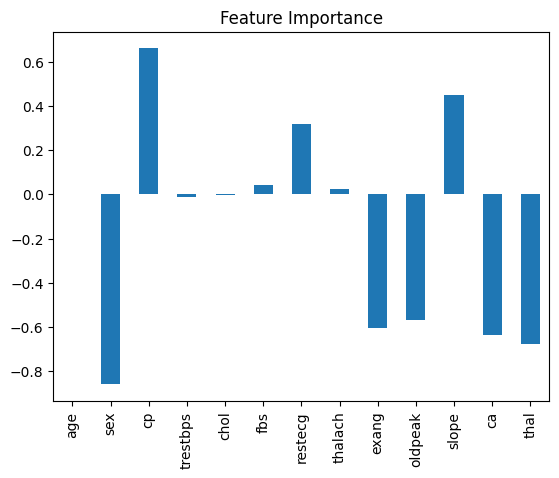

In [60]:
feature_df = pd.DataFrame(feature_dict ,index=[0])

feature_df.T.plot.bar(title = 'Feature Importance' , legend = False)

# Saving the model

In [61]:
from joblib import load,dump

dump(clf, 'HeartDiseaseClassificationModel.joblib')

['HeartDiseaseClassificationModel.joblib']